In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

Data preparation:

In [3]:
df = pd.read_csv("ENB2012_data.csv")

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.isnull().sum()

X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

In [6]:
newdf = df.dropna()
newdf

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


In [7]:
newdf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


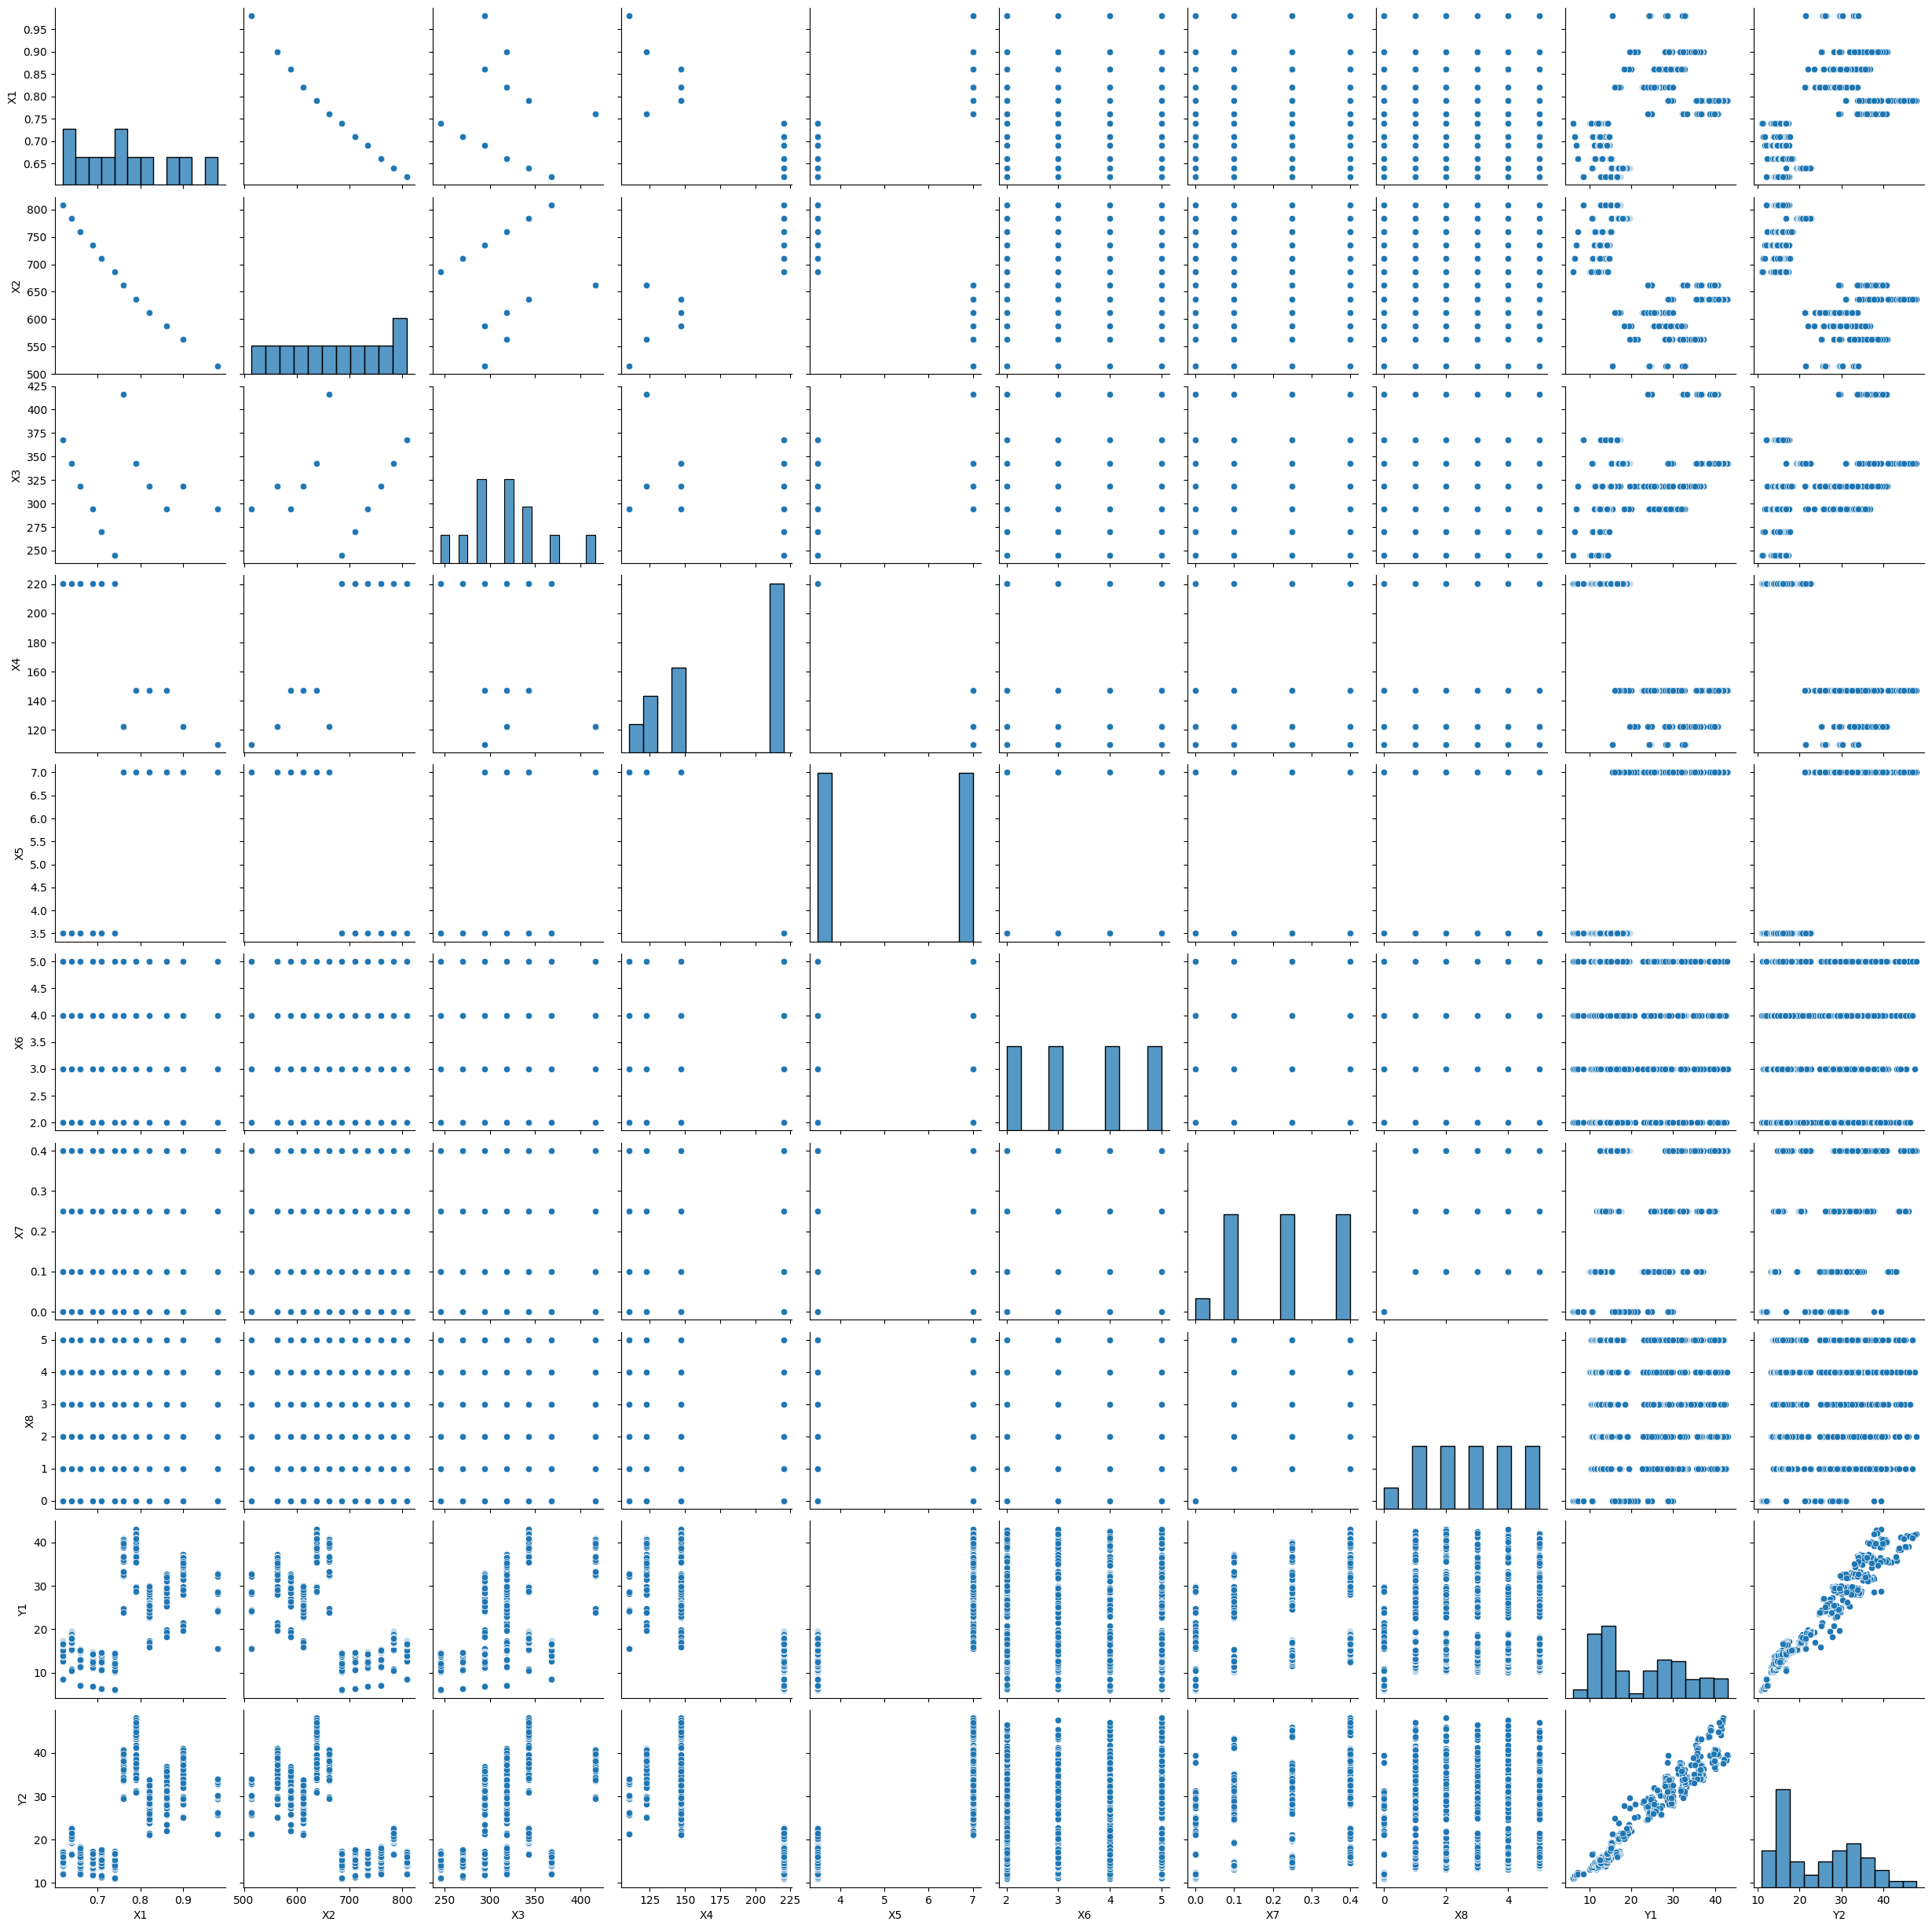

In [8]:
sns.pairplot(newdf)

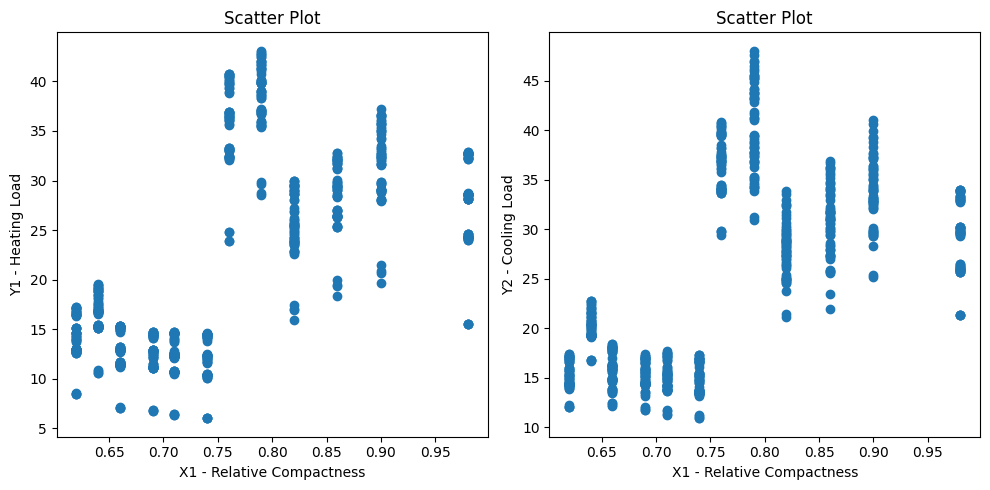

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X1'], newdf['Y1'])
axs[0].set_xlabel('X1 - Relative Compactness')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X1'], newdf['Y2'])
axs[1].set_xlabel('X1 - Relative Compactness')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

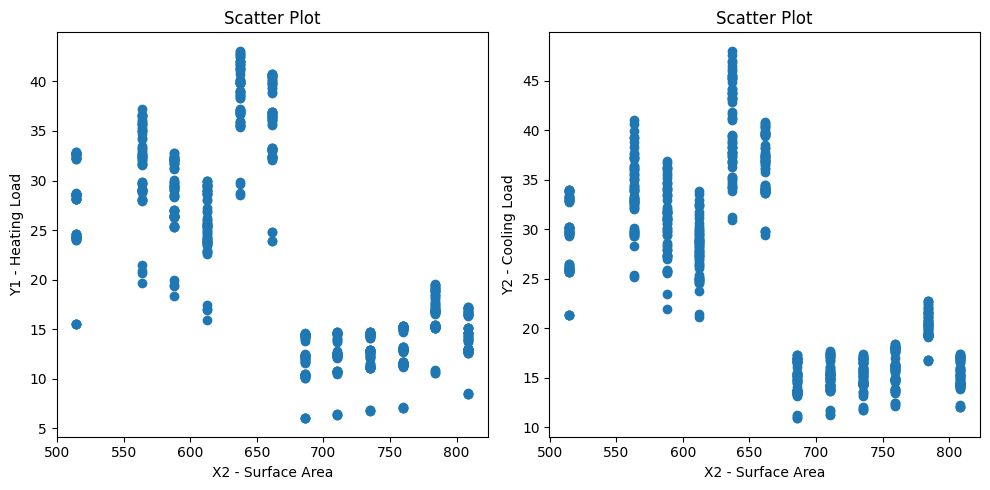

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X2'], newdf['Y1'])
axs[0].set_xlabel('X2 - Surface Area')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X2'], newdf['Y2'])
axs[1].set_xlabel('X2 - Surface Area')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

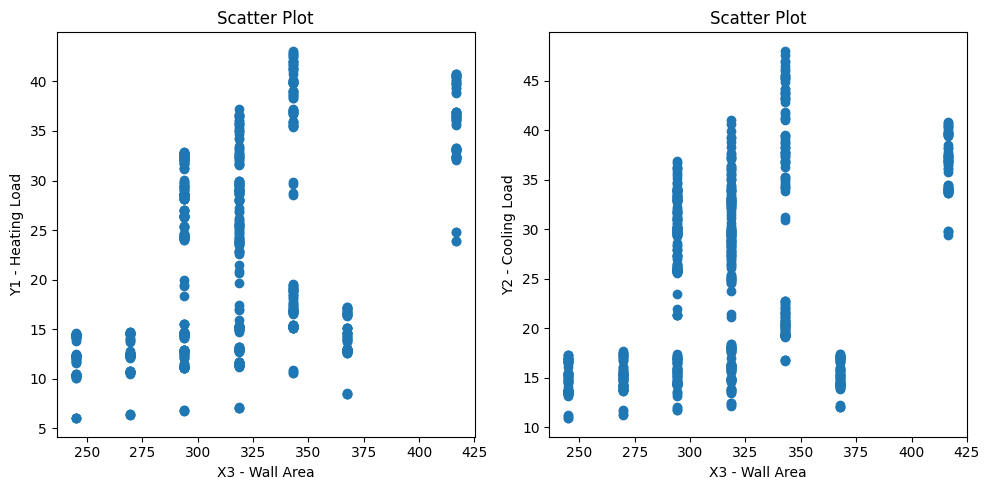

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X3'], newdf['Y1'])
axs[0].set_xlabel('X3 - Wall Area')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X3'], newdf['Y2'])
axs[1].set_xlabel('X3 - Wall Area')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout() 
plt.show()

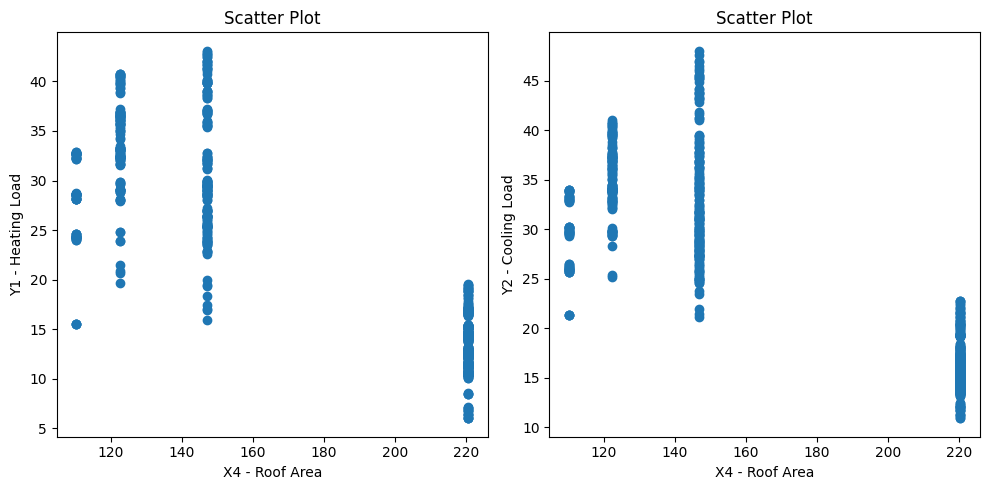

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X4'], newdf['Y1'])
axs[0].set_xlabel('X4 - Roof Area')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X4'], newdf['Y2'])
axs[1].set_xlabel('X4 - Roof Area')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  
plt.show()

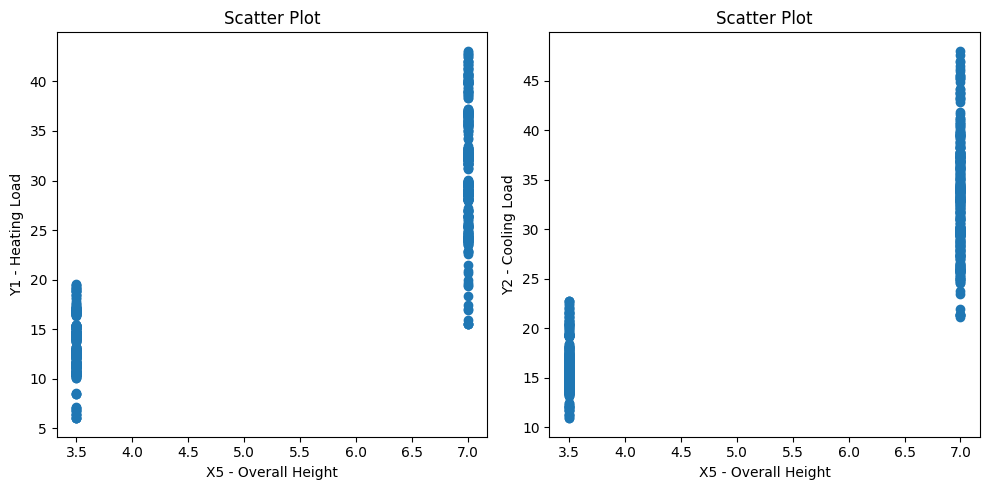

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X5'], newdf['Y1'])
axs[0].set_xlabel('X5 - Overall Height')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X5'], newdf['Y2'])
axs[1].set_xlabel('X5 - Overall Height')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  
plt.show()

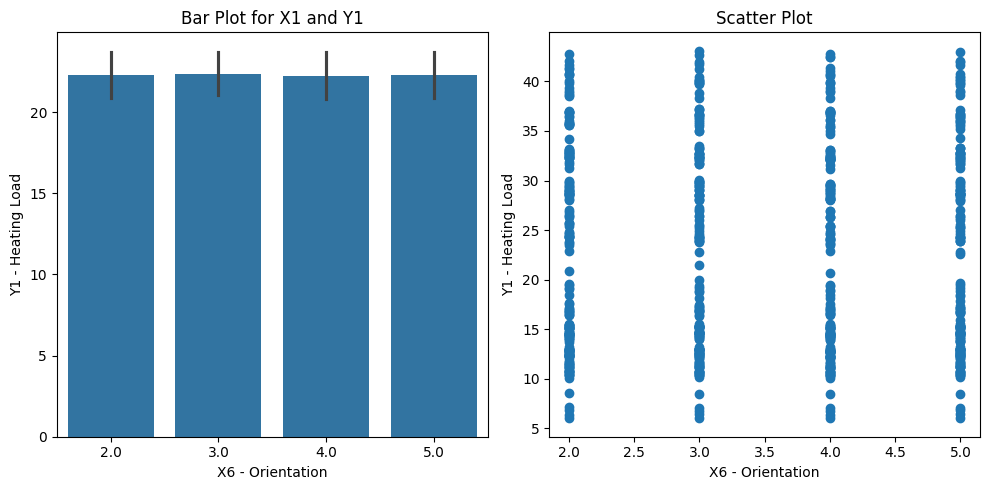

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Bar plot on the left
sns.barplot(x='X6', y='Y1', data=newdf, ax=axs[0])
axs[0].set_xlabel('X6 - Orientation')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Bar Plot for X1 and Y1')

# Regression plot on the right
axs[1].scatter(newdf['X6'], newdf['Y1'])
axs[1].set_xlabel('X6 - Orientation')
axs[1].set_ylabel('Y1 - Heating Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  
plt.show()

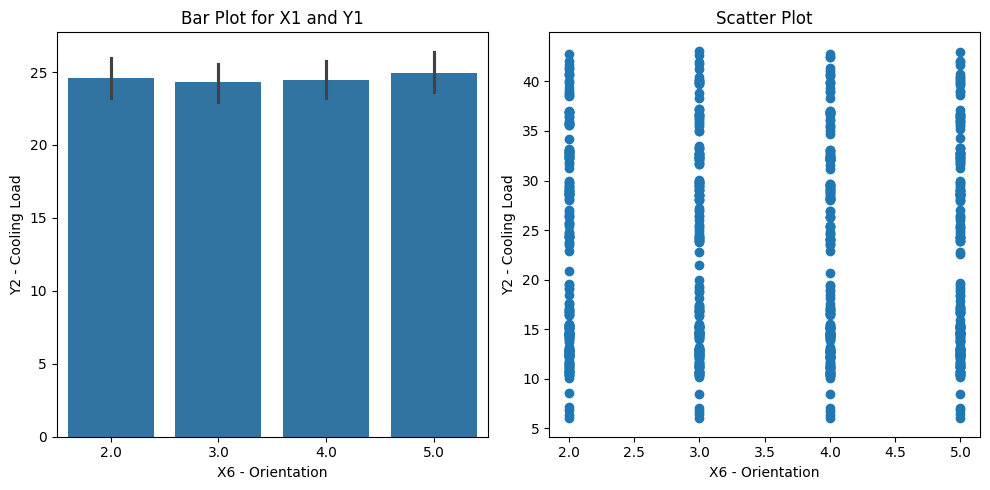

In [15]:
ig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Bar plot on the left
sns.barplot(x='X6', y='Y2', data=newdf, ax=axs[0])
axs[0].set_xlabel('X6 - Orientation')
axs[0].set_ylabel('Y2 - Cooling Load')
axs[0].set_title('Bar Plot for X1 and Y1')

# Regression plot on the right
axs[1].scatter(newdf['X6'], newdf['Y1'])
axs[1].set_xlabel('X6 - Orientation')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()
plt.show()

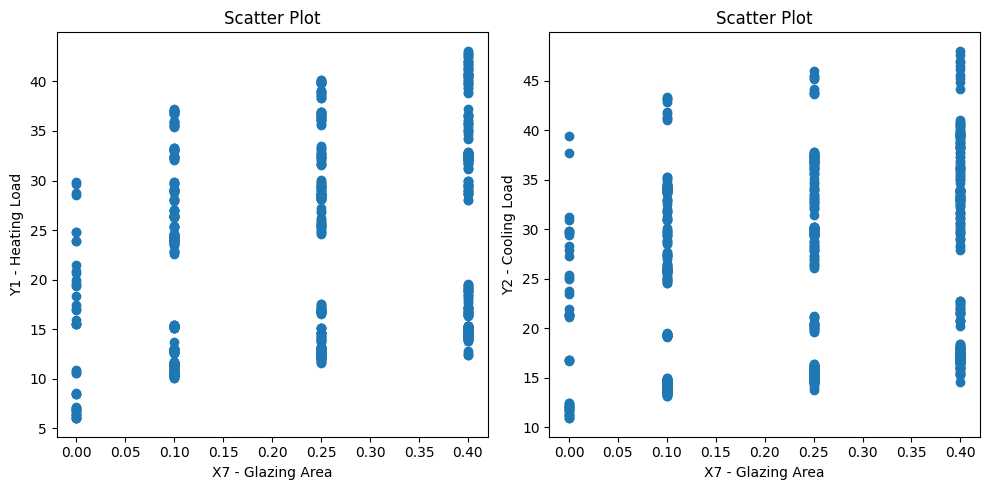

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Scatter plot on the left
axs[0].scatter(newdf['X7'], newdf['Y1'])
axs[0].set_xlabel('X7 - Glazing Area')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Scatter Plot')

# Regression plot on the right
axs[1].scatter(newdf['X7'], newdf['Y2'])
axs[1].set_xlabel('X7 - Glazing Area')
axs[1].set_ylabel('Y2 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout() 
plt.show()

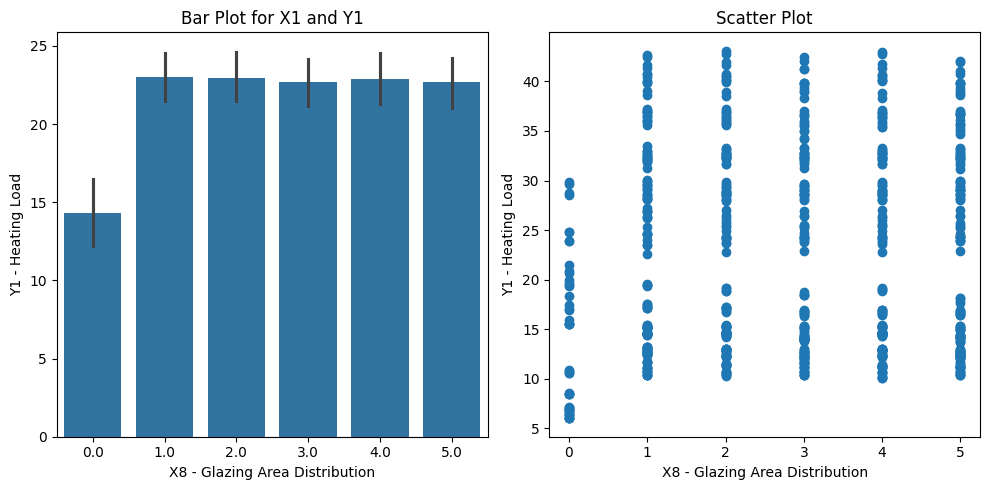

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Bar plot on the left
sns.barplot(x='X8', y='Y1', data=newdf, ax=axs[0])
axs[0].set_xlabel('X8 - Glazing Area Distribution')
axs[0].set_ylabel('Y1 - Heating Load')
axs[0].set_title('Bar Plot for X1 and Y1')

# Regression plot on the right
axs[1].scatter(newdf['X8'], newdf['Y1'])
axs[1].set_xlabel('X8 - Glazing Area Distribution')
axs[1].set_ylabel('Y1 - Heating Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  
plt.show()

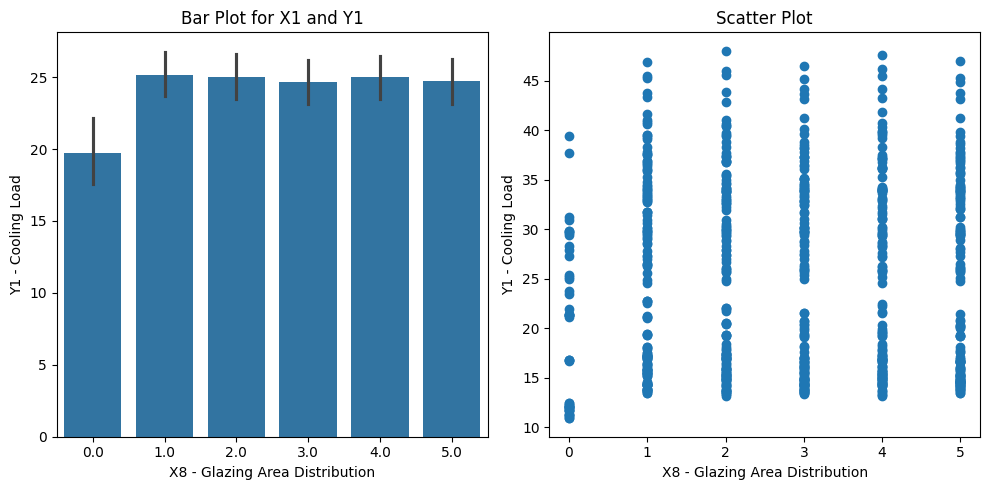

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and a 1x2 array of subplots

# Bar plot on the left
sns.barplot(x='X8', y='Y2', data=newdf, ax=axs[0])
axs[0].set_xlabel('X8 - Glazing Area Distribution')
axs[0].set_ylabel('Y1 - Cooling Load')
axs[0].set_title('Bar Plot for X1 and Y1')

# Regression plot on the right
axs[1].scatter(newdf['X8'], newdf['Y2'])
axs[1].set_xlabel('X8 - Glazing Area Distribution')
axs[1].set_ylabel('Y1 - Cooling Load')
axs[1].set_title('Scatter Plot')

plt.tight_layout()  
plt.show()

<Axes: >

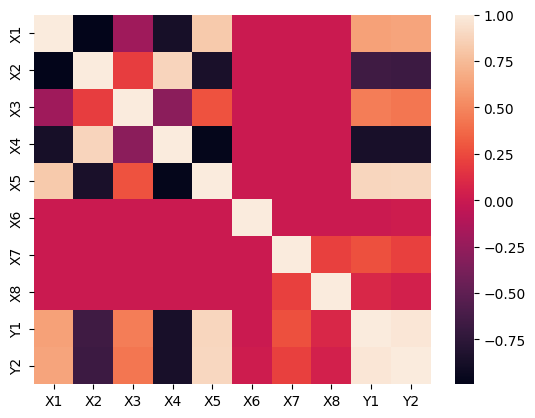

In [19]:
correlation = newdf.corr()
sns.heatmap(correlation)

Model selection and evaluation:

In [20]:
newdf1 = newdf.copy() #create a new copy of newdf
 
from sklearn.model_selection import train_test_split

X = newdf.drop(['Y1', 'Y2'], axis=1)  # Features
Y1 = newdf['Y1']  # Target variable(Heating load)
Y2 = newdf['Y2']  # Target variable(Cooling load)

In [21]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0


In [22]:
# Split the dataset to test and train
X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

X_train, X_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

In [23]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8
60,0.82,612.5,318.5,147.00,7.0,2.0,0.10,1.0
618,0.64,784.0,343.0,220.50,3.5,4.0,0.40,2.0
346,0.86,588.0,294.0,147.00,7.0,4.0,0.25,2.0
294,0.90,563.5,318.5,122.50,7.0,4.0,0.25,1.0
231,0.66,759.5,318.5,220.50,3.5,5.0,0.10,4.0
...,...,...,...,...,...,...,...,...
71,0.76,661.5,416.5,122.50,7.0,5.0,0.10,1.0
106,0.86,588.0,294.0,147.00,7.0,4.0,0.10,2.0
270,0.71,710.5,269.5,220.50,3.5,4.0,0.10,5.0
435,0.98,514.5,294.0,110.25,7.0,5.0,0.25,4.0


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense

# Linear Regression
lr1 = LinearRegression()
lr2 = LinearRegression()

# Ridge Regression
ridge1 = Ridge(alpha=1.0)
ridge2 = Ridge(alpha=1.0)

# Lasso Regression
lasso1 = Lasso(alpha=1.0)
lasso2 = Lasso(alpha=1.0)

In [25]:
# For Heating load
lr1.fit(X_train, y1_train)
ridge1.fit(X_train, y1_train)
lasso1.fit(X_train, y1_train)

# For Cooling load
lr2.fit(X_train, y2_train)
ridge2.fit(X_train, y2_train)
lasso2.fit(X_train, y2_train)

Lasso()

In [26]:
# Heating load

y1_pred_lr = lr1.predict(X_test)
y1_pred_ridge = ridge1.predict(X_test)
y1_pred_lasso = lasso1.predict(X_test)

print('Linear Regression MSE:', mean_squared_error(y1_test, y1_pred_lr))
print('Ridge Regression MSE:', mean_squared_error(y1_test, y1_pred_ridge))
print('Lasso Regression MSE:', mean_squared_error(y1_test, y1_pred_lasso))

print('Linear Regression R2:', r2_score(y1_test, y1_pred_lr))
print('Ridge Regression R2:', r2_score(y1_test, y1_pred_ridge))
print('Lasso Regression R2:', r2_score(y1_test, y1_pred_lasso))

Linear Regression MSE: 9.153524899869002
Ridge Regression MSE: 9.653457481031017
Lasso Regression MSE: 21.464928714117082
Linear Regression R2: 0.9121808615400413
Ridge Regression R2: 0.9073844963095998
Lasso Regression R2: 0.794064956680768


In [27]:
# Cooling load

y2_pred_lr = lr2.predict(X_test)
y2_pred_ridge = ridge2.predict(X_test)
y2_pred_lasso = lasso2.predict(X_test)

print('Linear Regression MSE:', mean_squared_error(y2_test, y2_pred_lr))
print('Ridge Regression MSE:', mean_squared_error(y2_test, y2_pred_ridge))
print('Lasso Regression MSE:', mean_squared_error(y2_test, y2_pred_lasso))

print('Linear Regression R2:', r2_score(y2_test, y2_pred_lr))
print('Ridge Regression R2:', r2_score(y2_test, y2_pred_ridge))
print('Lasso Regression R2:', r2_score(y2_test, y2_pred_lasso))

Linear Regression MSE: 9.893292895211355
Ridge Regression MSE: 10.345298536350889
Lasso Regression MSE: 21.106622983729697
Linear Regression R2: 0.8932269811749011
Ridge Regression R2: 0.8883487260437098
Lasso Regression R2: 0.772207506939691


Interpretation and Recommendations:

In [28]:
lr1.fit(X_train, y1_train)

# Get the coefficient of the linear regression model
coefficients1 = lr1.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients1)):
   print(f'One unit increase in {features[i]}, the Heating load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Heating load will increase by -61.8715861579734 units.
One unit increase in Surface Area, the Heating load will increase by 3654151663.063554 units.
One unit increase in Wall Area, the Heating load will increase by -3654151663.0861034 units.
One unit increase in Roof Area, the Heating load will increase by -7308303326.296145 units.
One unit increase in Overall Height, the Heating load will increase by 4.123676188290119 units.
One unit increase in Orientation, the Heating load will increase by -0.03244250963325612 units.
One unit increase in Glazing Area, the Heating load will increase by 20.143173701468186 units.
One unit increase in Glazing Area Distribution, the Heating load will increase by 0.21110016991588054 units.


In [29]:
ridge1.fit(X_train, y1_train)

# Get the coefficient of the ridge regression model
coefficients1 = ridge1.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients1)):
   print(f'One unit increase in {features[i]}, the Heating load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Heating load will increase by -3.918299456388533 units.
One unit increase in Surface Area, the Heating load will increase by 0.012018872881274392 units.
One unit increase in Wall Area, the Heating load will increase by 0.035546168354636906 units.
One unit increase in Roof Area, the Heating load will increase by -0.011763647463423026 units.
One unit increase in Overall Height, the Heating load will increase by 5.286281123752841 units.
One unit increase in Orientation, the Heating load will increase by -0.021304872449505876 units.
One unit increase in Glazing Area, the Heating load will increase by 18.52563706171476 units.
One unit increase in Glazing Area Distribution, the Heating load will increase by 0.24709366144564462 units.


In [30]:
lasso1.fit(X_train, y1_train)

# Get the coefficient of the lasso regression model
coefficients1 = lasso1.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients1)):
   print(f'One unit increase in {features[i]}, the Heating load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Heating load will increase by -0.0 units.
One unit increase in Surface Area, the Heating load will increase by -0.07739549224441696 units.
One unit increase in Wall Area, the Heating load will increase by 0.12650197320427845 units.
One unit increase in Roof Area, the Heating load will increase by -0.02448016900551962 units.
One unit increase in Overall Height, the Heating load will increase by 0.0 units.
One unit increase in Orientation, the Heating load will increase by -0.0 units.
One unit increase in Glazing Area, the Heating load will increase by 0.0 units.
One unit increase in Glazing Area Distribution, the Heating load will increase by 0.1416313311827741 units.


In [31]:
lr2.fit(X_train, y2_train)

# Get the coefficient of the linear regression model
coefficients2 = lr2.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients2)):
   print(f'One unit increase in {features[i]}, the Cooling load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Cooling load will increase by -0.0 units.
One unit increase in Surface Area, the Cooling load will increase by -0.07739549224441696 units.
One unit increase in Wall Area, the Cooling load will increase by 0.12650197320427845 units.
One unit increase in Roof Area, the Cooling load will increase by -0.02448016900551962 units.
One unit increase in Overall Height, the Cooling load will increase by 0.0 units.
One unit increase in Orientation, the Cooling load will increase by -0.0 units.
One unit increase in Glazing Area, the Cooling load will increase by 0.0 units.
One unit increase in Glazing Area Distribution, the Cooling load will increase by 0.1416313311827741 units.


In [32]:
ridge2.fit(X_train, y2_train)

# Get the coefficient of the ridge regession  model
coefficients2 = ridge2.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients2)):
   print(f'One unit increase in {features[i]}, the Cooling load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Cooling load will increase by -0.0 units.
One unit increase in Surface Area, the Cooling load will increase by -0.07739549224441696 units.
One unit increase in Wall Area, the Cooling load will increase by 0.12650197320427845 units.
One unit increase in Roof Area, the Cooling load will increase by -0.02448016900551962 units.
One unit increase in Overall Height, the Cooling load will increase by 0.0 units.
One unit increase in Orientation, the Cooling load will increase by -0.0 units.
One unit increase in Glazing Area, the Cooling load will increase by 0.0 units.
One unit increase in Glazing Area Distribution, the Cooling load will increase by 0.1416313311827741 units.


In [33]:
# Assume X_train, y_train are your data
lasso2.fit(X_train, y2_train)

# Get the coefficient of the model
coefficients2 = lasso2.coef_

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

for i in range(len(coefficients2)):
   print(f'One unit increase in {features[i]}, the Cooling load will increase by {coefficients1[i]} units.')

One unit increase in Relative Compactness, the Cooling load will increase by -0.0 units.
One unit increase in Surface Area, the Cooling load will increase by -0.07739549224441696 units.
One unit increase in Wall Area, the Cooling load will increase by 0.12650197320427845 units.
One unit increase in Roof Area, the Cooling load will increase by -0.02448016900551962 units.
One unit increase in Overall Height, the Cooling load will increase by 0.0 units.
One unit increase in Orientation, the Cooling load will increase by -0.0 units.
One unit increase in Glazing Area, the Cooling load will increase by 0.0 units.
One unit increase in Glazing Area Distribution, the Cooling load will increase by 0.1416313311827741 units.


Get some predictions

In [34]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]
predictions = lr1.predict(new_data)
print('Predicted heating load:', predictions)

Predicted heating load: [19.18707815]


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]
predictions = ridge1.predict(new_data)
print('Predicted heating load:', predictions)

Predicted heating load: [20.01392535]


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [36]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]
predictions = lasso1.predict(new_data)
print('Predicted heating load:', predictions)

Predicted heating load: [17.14949883]


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [37]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]
predictions = lr2.predict(new_data)
print('Predicted cooling load:', predictions)

Predicted cooling load: [19.98826957]


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]

print('Predicted heating load:', predictions)

Predicted heating load: [19.98826957]


In [39]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]]
predictions = lasso2.predict(new_data)
print('Predicted heating load:', predictions)

Predicted heating load: [18.97386531]


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Neural Network Integration:

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu')) # Input layer with 8 neurons
model.add(Dense(64, activation='relu')) # Hidden layer with 64 neurons
model.add(Dense(2, activation='linear')) # Output layer with 2 neurons (for 2 target variables)

In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
model.fit(X_train, y1_train, epochs=100, batch_size=10)

Epoch 1/100

62/62 [==============================] - 1s 1ms/step - loss: 353.7870
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 68.7440
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 38.8068
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 33.7846
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 33.6045
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 33.2066
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 32.2723
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 27.3782
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 24.6218
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 23.8415
Epoch 11/100
62/62 [==============================] - 0s 1ms/step - loss: 21.5361
Epoch 12/100
62/62 [==============================] - 0s 993us/step - loss: 21.1915
Epoch 13/100
62/62 [=

In [44]:
loss = model.evaluate(X_test, y1_test)

5/5 [==============================] - 0s 2ms/step - loss: 17.1135


In [45]:
new_data = [[0.62,808.5,367.5,220.50,3.5,5.0,0.4,5.0]] # replace with actual values
predictions = model.predict(new_data)
predictions

1/1 [==============================] - 0s 100ms/step


array([[23.16957 , 19.245178]], dtype=float32)

In [46]:
X = newdf1.drop(['Y1', 'Y2'], axis=1)  # Features (all columns except 'Y1')
Y = newdf1[['Y1', 'Y2']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
# Get predictions from the neural network model
nn_predictions = model.predict(X_test)

# Split the true labels into two arrays
y1_test = y_test['Y1']
y2_test = y_test['Y2']

5/5 [==============================] - 0s 1ms/step


In [48]:
# Split the predictions from the neural network into two arrays
nn_predictions1 = nn_predictions[:, 0]
nn_predictions2 = nn_predictions[:, 1]

# Calculate MSE for each output
mse_nn1 = mean_squared_error(y1_test, nn_predictions1)
mse_nn2 = mean_squared_error(y2_test, nn_predictions2)

# Calculate R-squared for each output
r2_nn1 = r2_score(y1_test, nn_predictions1)
r2_nn2 = r2_score(y2_test, nn_predictions2)

In [49]:
print("Neural Network MSE for Heating Load: ", mse_nn1)
print("Neural Network MSE for Cooling Load: ", mse_nn2)

print("Neural Network R-squared for Heating Load: ", r2_nn1)
print("Neural Network R-squared for Cooling Load: ", r2_nn2)


Neural Network MSE for Heating Load:  24.57901807259727
Neural Network MSE for Cooling Load:  11.820097742211635
Neural Network R-squared for Heating Load:  0.7641883083359354
Neural Network R-squared for Cooling Load:  0.8724320070060243
